#### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.set_printoptions(sci_mode=False)

In [3]:
from clonaltrans import utils
paga, array_total = utils.get_topo_obs('./data/')

Topology graph loaded (11, 11).
Input cell data (num_timepoints 3, num_clones 10, num_populations 11) loaded.
Day0 has been added. Input data shape: torch.Size([4, 10, 11])
Background reference cells generated. Input data shape: torch.Size([4, 11, 11])


In [8]:
(array_total.sum(0) != 0).to(torch.float32).unsqueeze(0).shape

torch.Size([1, 11, 11])

#### Test

In [ ]:
from clonaltrans import main, config

config = config.Configuration()
config.learning_rate = 0.01
config.num_epochs = 1000
config.lrs_step = 200
config.lrs_gamma = 0.5

model = main.run_model(config, torch.tensor([0.0, 3.0, 10.0, 17.0]))

In [ ]:
torch.save(model, './model.pt')

In [3]:
model = torch.load('./examples/epoch1000lr001step200gamma05NLog.pt')
device = torch.device("cuda:3")

There are 3 observed timepoints except the inital time.


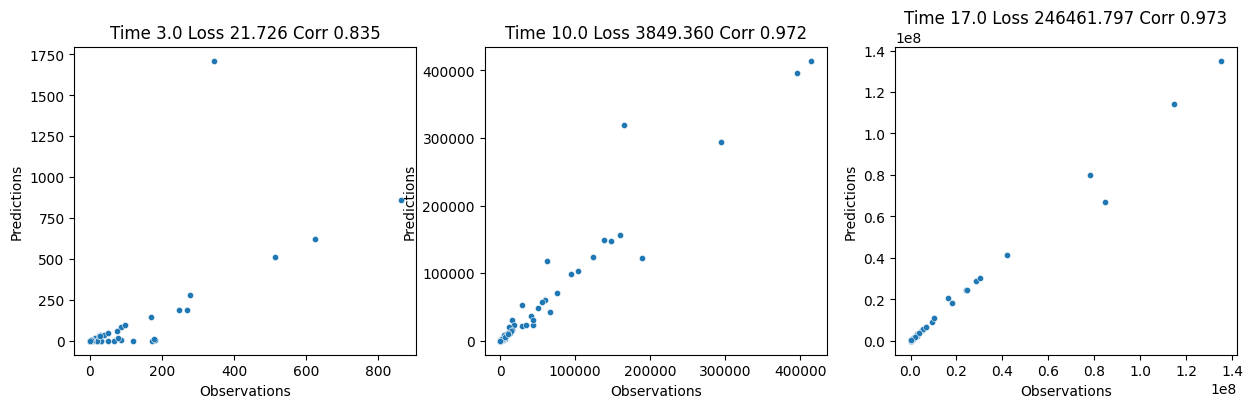

In [4]:
from clonaltrans import pl
t_observed = torch.tensor([0.0, 3.0, 10.0, 17.0]).to(device)
pl.eval_predictions(model, t_observed)

#### Timepoints Smoothing

In [ ]:
model = torch.load('./examples/Gelu_Alpha0.01_Beta0.01_Epoch2000_LR0.05_Log/model.pt')
device = torch.device("cuda:3")

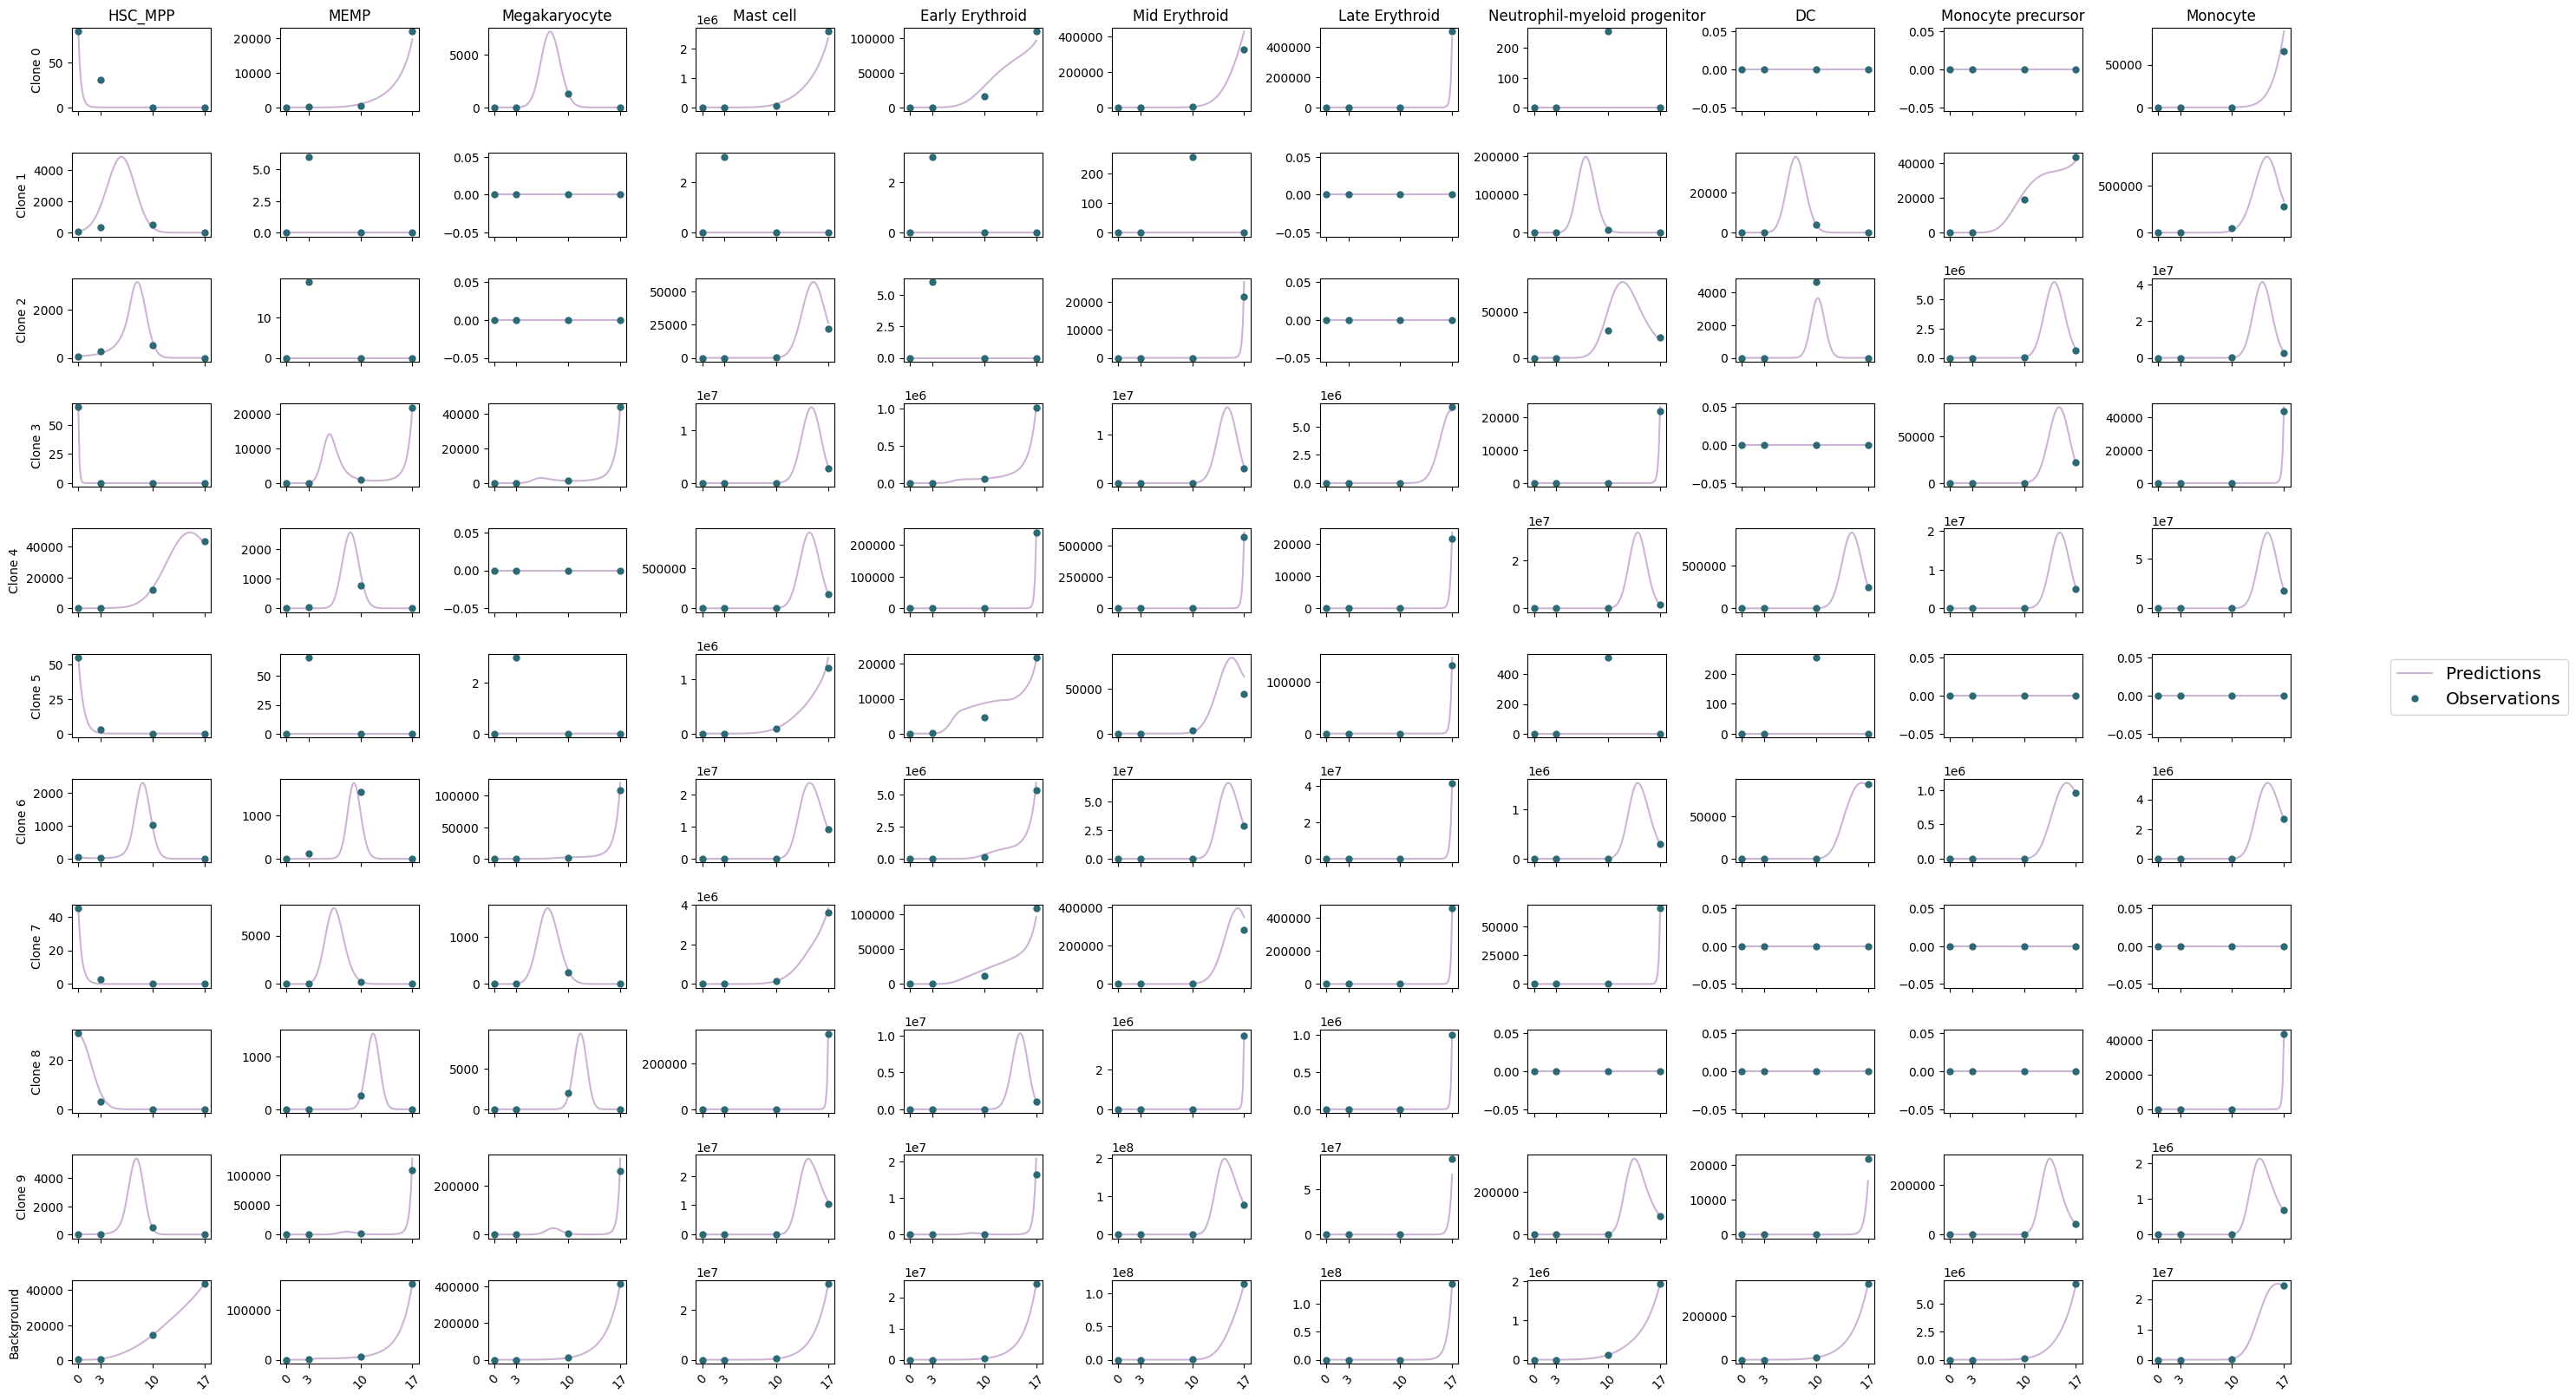

In [6]:
from clonaltrans import pl
t_observed = torch.tensor([0.0, 3.0, 10.0, 17.0]).to(device)
# t_observed = (t_observed - t_observed[0]) / (t_observed[-1] - t_observed[0])

x = np.linspace(0, 17, 100)
t_pred = torch.tensor(x).to(device)
t_pred_norm = (t_pred - t_pred[0]) / (t_pred[-1] - t_pred[0])
predictions = model.eval_model(t_pred_norm)
pl.grid_visual_interpolate(model.N, predictions, t_observed, t_pred)